wind_power_generation_forecasting

In [2]:
pip install numpy pandas seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
location1=pd.read_csv('Location1.csv')
location2=pd.read_csv('Location2.csv')
location3=pd.read_csv('Location3.csv')
location4=pd.read_csv('Location4.csv')

In [5]:
location1.head()
location2.head()
location3.head()
location4.head()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
0,2017-01-02 00:00:00,22.7,82,18.0,3.21,7.60,86,90,5.3,0.3047
1,2017-01-02 01:00:00,22.0,82,17.4,3.40,7.92,88,94,5.7,0.3516
2,2017-01-02 02:00:00,21.7,82,17.1,3.81,8.41,87,93,6.4,0.3985
3,2017-01-02 03:00:00,21.7,85,17.8,3.70,8.26,90,97,6.4,0.4454
4,2017-01-02 04:00:00,22.4,88,19.5,3.85,8.50,81,91,6.6,0.4922


In [6]:
location1['Location']='Location1'
location2['Location']='Location2'
location3['Location']='Location3'
location4['Location']='Location4'

merged_data=pd.concat([location1,location2,location3,location4],ignore_index=True)
merged_data.head()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635,Location1
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424,Location1
2,2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214,Location1
3,2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003,Location1
4,2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793,Location1


In [7]:
merged_data.to_csv('merged_location.csv',index=False)

In [8]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175200 entries, 0 to 175199
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Time                 175200 non-null  object 
 1   temperature_2m       175200 non-null  float64
 2   relativehumidity_2m  175200 non-null  int64  
 3   dewpoint_2m          175200 non-null  float64
 4   windspeed_10m        175200 non-null  float64
 5   windspeed_100m       175200 non-null  float64
 6   winddirection_10m    175200 non-null  int64  
 7   winddirection_100m   175200 non-null  int64  
 8   windgusts_10m        175200 non-null  float64
 9   Power                175200 non-null  float64
 10  Location             175200 non-null  object 
dtypes: float64(6), int64(3), object(2)
memory usage: 14.7+ MB


In [9]:
merged_data.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature_2m,175200.0,46.655994,22.012738,-31.2,30.2000,46.9000,65.3000,101.7000
relativehumidity_2m,175200.0,70.155291,17.326678,9.0,57.0000,72.0000,84.0000,100.0000
dewpoint_2m,175200.0,36.516241,20.933153,-36.2,21.9000,36.2000,54.6000,78.7000
windspeed_10m,175200.0,4.157639,2.012682,0.0,2.6300,3.8500,5.3800,18.5300
windspeed_100m,175200.0,6.879334,3.043964,0.0,4.7000,6.6800,8.8000,24.5900
winddirection_10m,175200.0,201.589446,99.639040,1.0,130.0000,211.0000,288.0000,360.0000
winddirection_100m,175200.0,201.539070,100.683777,0.0,129.0000,211.0000,290.0000,360.0000
windgusts_10m,175200.0,8.038205,3.617488,0.5,5.3000,7.6000,10.3000,29.2000
Power,175200.0,0.303429,0.257325,0.0,0.0877,0.2331,0.4742,0.9994


In [10]:
merged_data.isnull().sum()

Time                   0
temperature_2m         0
relativehumidity_2m    0
dewpoint_2m            0
windspeed_10m          0
windspeed_100m         0
winddirection_10m      0
winddirection_100m     0
windgusts_10m          0
Power                  0
Location               0
dtype: int64

In [11]:
merged_data.duplicated().sum()

0

In [12]:
merged_data=pd.get_dummies(merged_data,columns=['Location'],drop_first=True)
merged_data.head()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location_Location2,Location_Location3,Location_Location4
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635,False,False,False
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424,False,False,False
2,2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214,False,False,False
3,2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003,False,False,False
4,2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793,False,False,False


In [13]:
merged_data.columns

Index(['Time', 'temperature_2m', 'relativehumidity_2m', 'dewpoint_2m',
       'windspeed_10m', 'windspeed_100m', 'winddirection_10m',
       'winddirection_100m', 'windgusts_10m', 'Power', 'Location_Location2',
       'Location_Location3', 'Location_Location4'],
      dtype='object')

In [14]:
merged_data.drop('Time',axis=1,inplace=True)

In [15]:
merged_data.head()

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location_Location2,Location_Location3,Location_Location4
0,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635,False,False,False
1,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424,False,False,False
2,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214,False,False,False
3,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003,False,False,False
4,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793,False,False,False


Week2:EDA

In [17]:
numerical_columns=merged_data.select_dtypes(include=['number']).columns
numerical_columns

Index(['temperature_2m', 'relativehumidity_2m', 'dewpoint_2m', 'windspeed_10m',
       'windspeed_100m', 'winddirection_10m', 'winddirection_100m',
       'windgusts_10m', 'Power'],
      dtype='object')

In [18]:
merged_data.shape

(175200, 12)

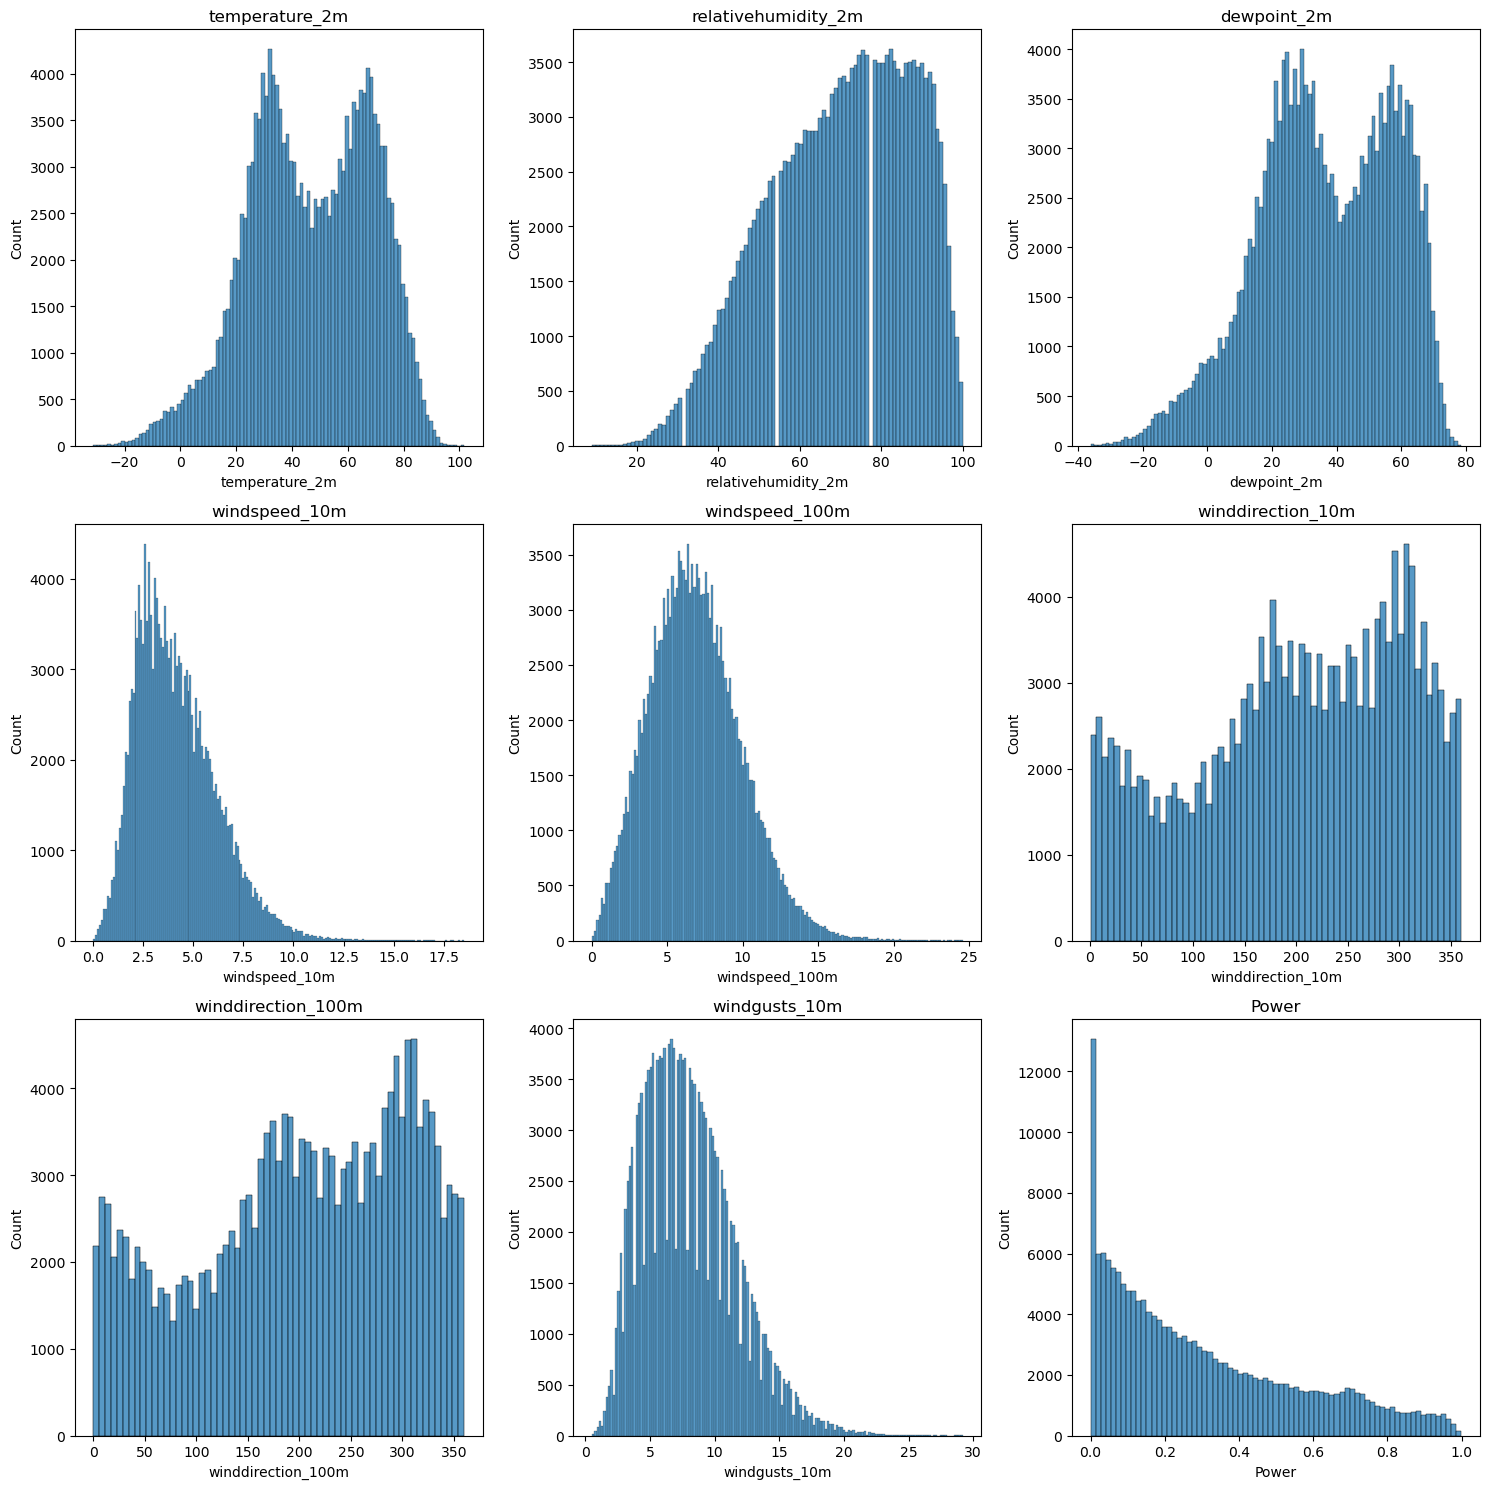

In [19]:
fig,axes=plt.subplots(3,3,figsize=(15,15))
axes=axes.flatten()
for i,col in enumerate(numerical_columns):
    sns.histplot(merged_data[col],ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

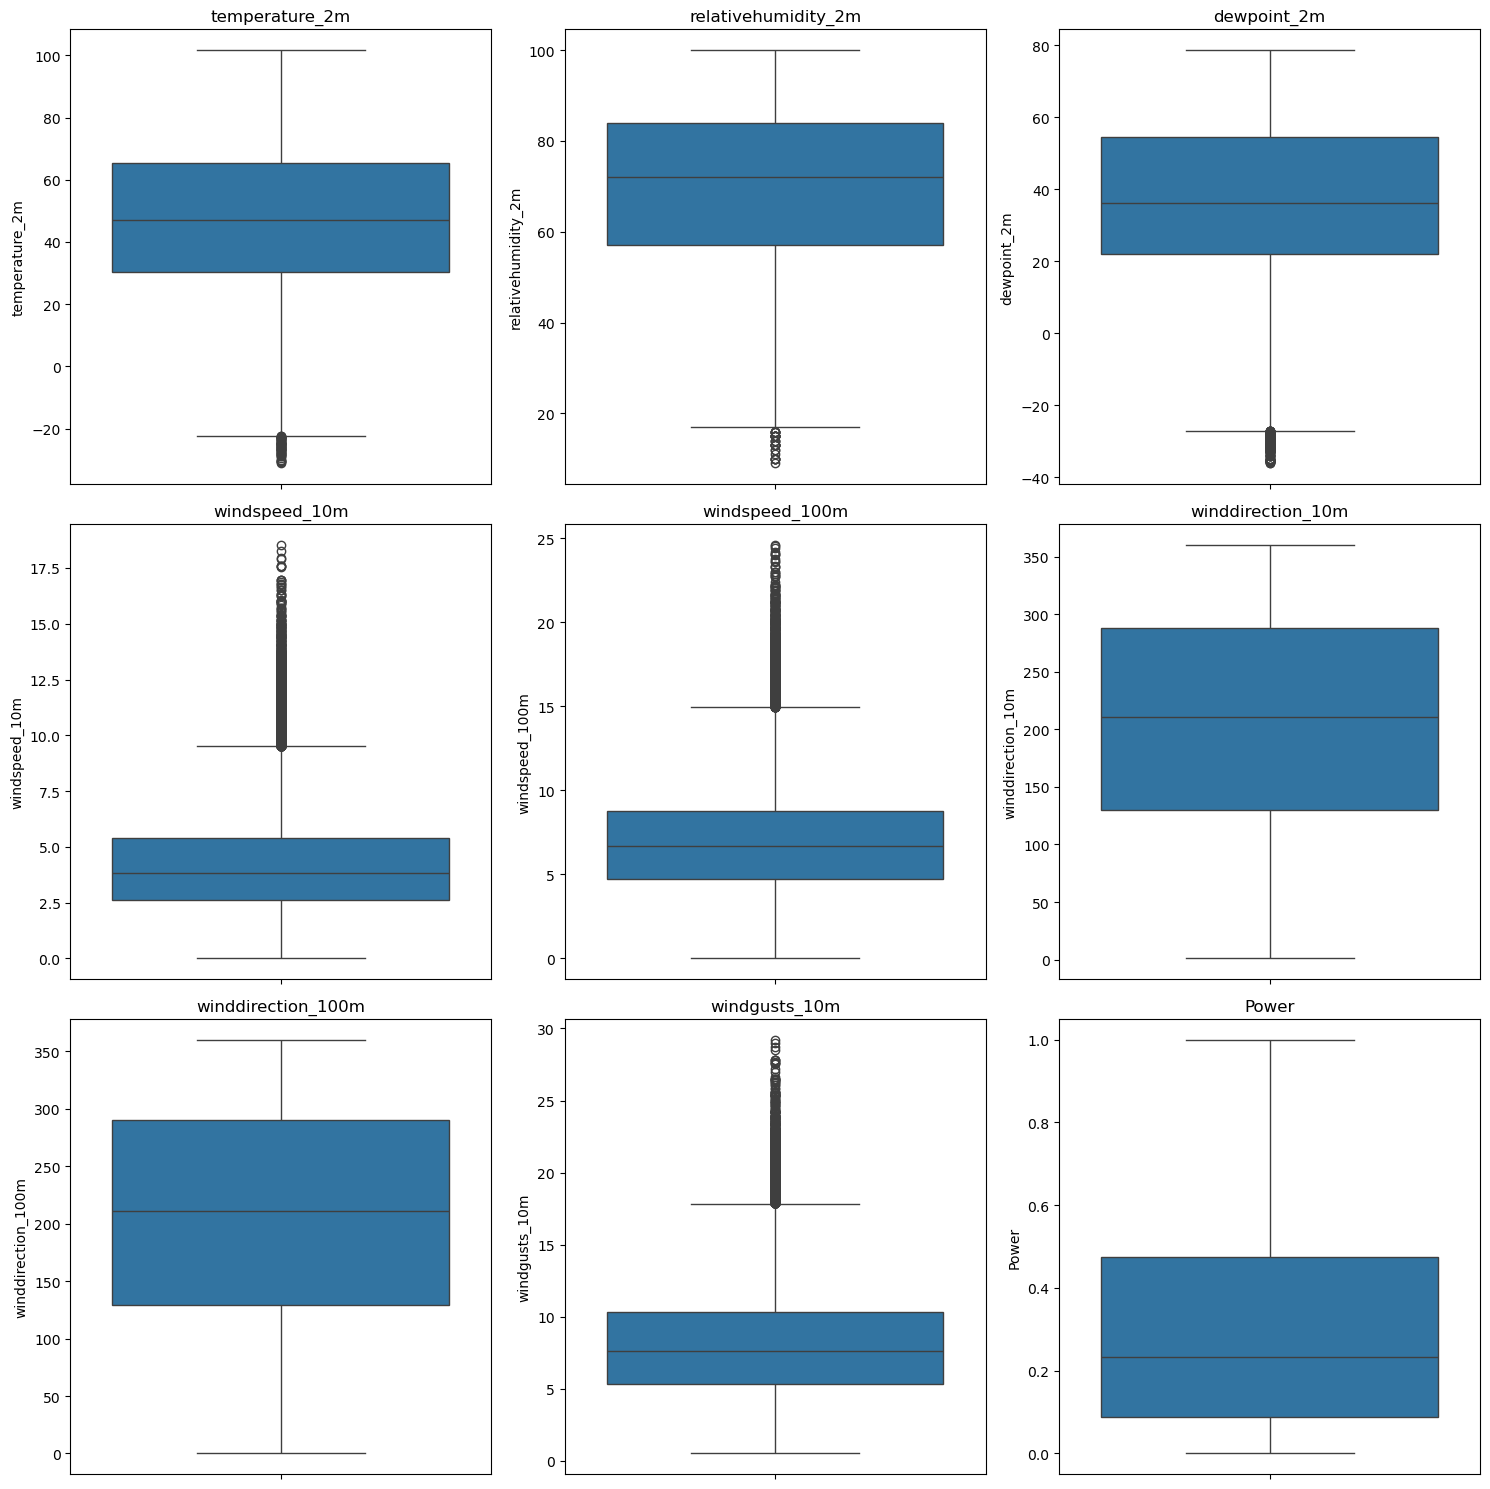

In [20]:
fig,axes=plt.subplots(3,3,figsize=(15,15))
axes=axes.flatten()
for i,col in enumerate(numerical_columns):
     sns.boxplot(merged_data[col],ax=axes[i])
     axes[i].set_title(col)
plt.tight_layout()
plt.show()

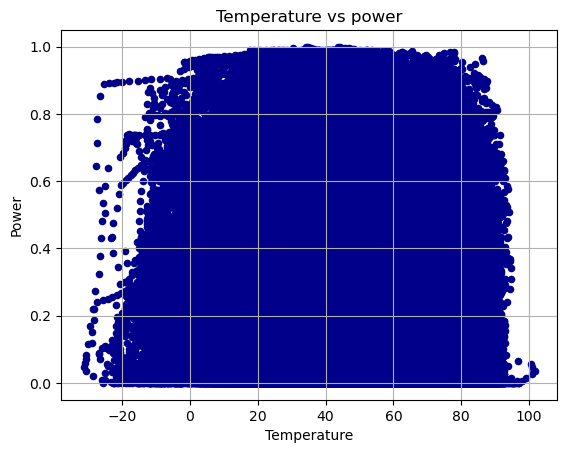

In [21]:
merged_data.plot.scatter(x='temperature_2m',y='Power',c='DarkBlue')
plt.xlabel('Temperature')
plt.ylabel('Power')
plt.title('Temperature vs power')
plt.grid(True)
plt.show()

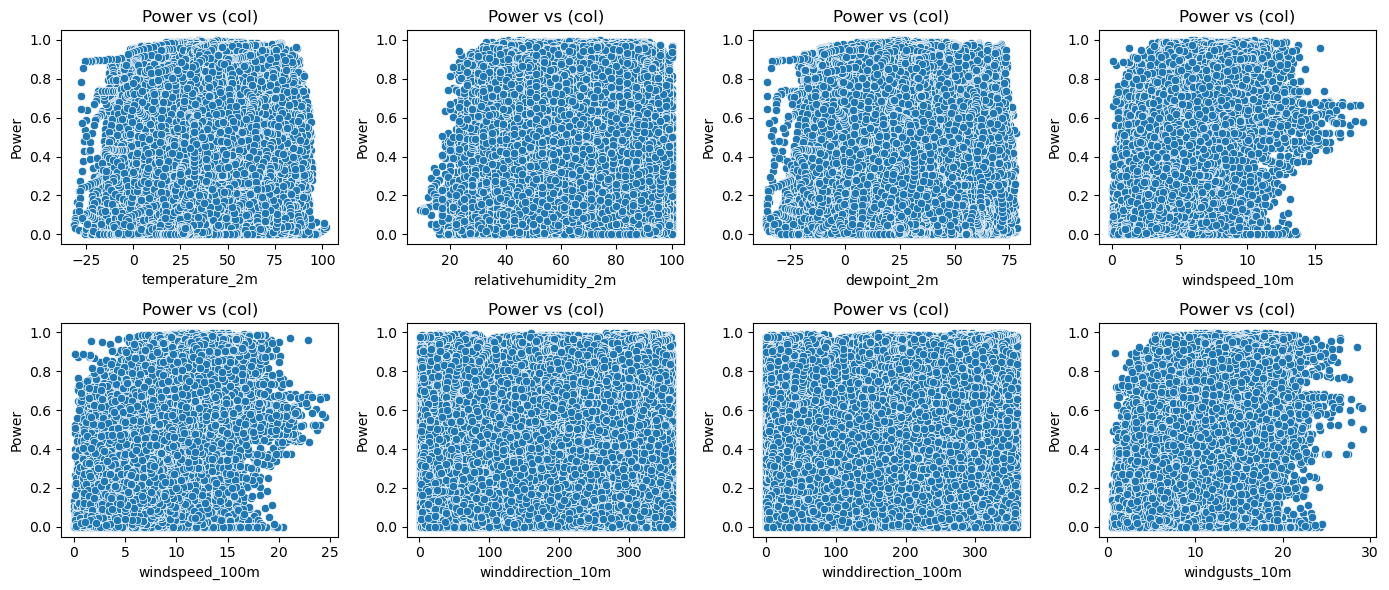

In [22]:
fig,axes=plt.subplots(2,4,figsize=(14,6))
axes=axes.flatten()
for i,col in enumerate(numerical_columns.drop('Power')):
     sns.scatterplot(x=col,y='Power',data=merged_data,ax=axes[i])
     axes[i].set_title(f'Power vs (col)')
     axes[i].set_xlabel(col)
     axes[i].set_ylabel('Power')
plt.tight_layout()
plt.show()

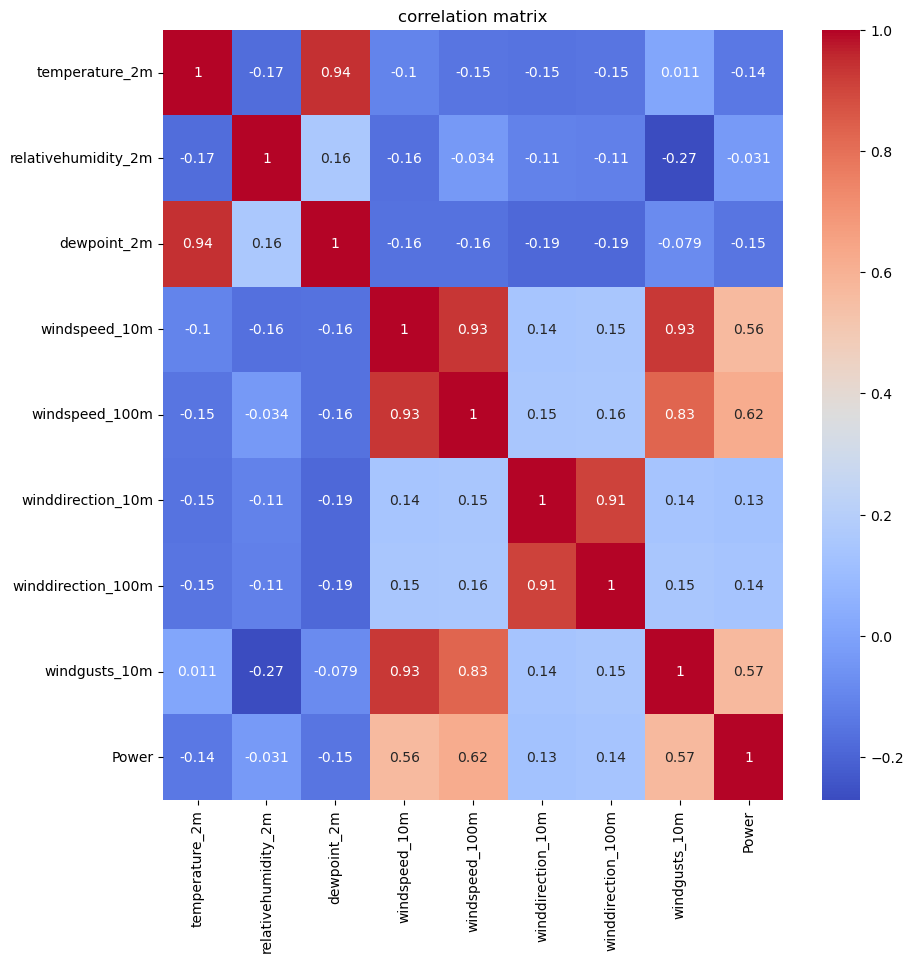

In [23]:
correlation=merged_data[numerical_columns].corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,annot=True,cmap='coolwarm')
plt.title('correlation matrix')
plt.show()


week 3: data modeling and evaluate

In [25]:
#feature and target selection
X=merged_data.drop('Power',axis=1)
y=merged_data['Power']

In [26]:
# split the data into training and test sets
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [27]:
#scale the numerical features
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [28]:
#train with linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
model=LinearRegression()
# train the model
model.fit(X_train,y_train)

LinearRegression()

In [29]:
# make the predictions
y_pred= model.predict(X_test)
#evaluate the model
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f'mean absolute error:{mae}')
print(f'mean squared error:{mse}')
print(f'R squared score:{r2}')

mean absolute error:0.1376585805337513
mean squared error:0.03254230698731513
R squared score:0.5127994646410983


In [30]:
# train using random forest regressor
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor(n_estimators=100,random_state=42)
rf_model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [31]:
#let us predect
y_pred_rf=rf_model.predict(X_test)

#evaluate the model
mae_rf = mean_absolute_error(y_test,y_pred_rf)
mse_rf = mean_squared_error(y_test,y_pred_rf)
r2_rf = r2_score(y_test,y_pred_rf)

print(f'RF MAE:{mae_rf}')
print(f'RF MSE:{mse_rf}')
print(f'RF R2 score:{r2_rf}')


RF MAE:0.10662940119863015
RF MSE:0.02155910436314834
RF R2 score:0.6772322505691262


In [32]:
!pip install xgboost

In [33]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor()
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [34]:
y_pred_xgb =xgb_model.predict(X_test)
mae_xgb= mean_absolute_error(y_test,y_pred_xgb)
mse_xgb= mean_squared_error(y_test,y_pred_xgb)
r2_xgb= r2_score(y_test,y_pred_xgb)
print(f'XGB MAE:{mae_xgb}')
print(f'XGB MSE:{mse_xgb}')
print(f'XGB R2:{r2_xgb}')

XGB MAE:0.11572619130940615
XGB MSE:0.024946639423317377
XGB R2:0.6265164578779464


In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=3,
    n_jobs=-1
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best MAE: {-grid_search.best_score_}")

# Evaluate the tuned model
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

# Calculate evaluation metrics
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

print(f"Tuned model mean absolute error (MAE): {mae_tuned}")
print(f"Tuned model mean squared error (MSE): {mse_tuned}")
print(f"Tuned model R² score: {r2_tuned}")

Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}
Best MAE: 0.11419443258532602
Tuned model mean absolute error (MAE): 0.11372485597103035
Tuned model mean squared error (MSE): 0.024059480759037515
Tuned model R² score: 0.6397983735194501
